## **Library dan Modul**

In [21]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
# import metric
from keras.metrics import categorical_crossentropy
# optimization method
from keras.optimizers import SGD
import os
from tensorflow.python. keras.utils.vis_utils import model_to_dot
from IPython.display import SVG
import pydot
import graphviz
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import cv2
from PIL import Image
import numpy as np
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix
import seaborn as sns 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
# metric
from keras.metrics import binary_crossentropy
# optimization method (Stochastic Gradient Descent (SGD))
from keras.optimizers import SGD

# **Dataset**

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
train_path = '/content/drive/MyDrive/EKG RSUI' + '/' + 'training_set/' 
test_path = '/content/drive/MyDrive/EKG RSUI' + '/' + 'test_set/'

## **Pre-Processing Data**

In [4]:
print('The training set consists of ', len(os.listdir(train_path + 'normal')), 
      ' normal images and ', len(os.listdir(train_path + 'abnormal')), ' abnormal images.' )

The training set consists of  86  normal images and  84  abnormal images.


In [5]:
print('The test set consists of ', len(os.listdir(test_path + 'normal')), 
      ' normal images and ', len(os.listdir(test_path + 'abnormal')), ' abnormal images.' )

The test set consists of  18  normal images and  18  abnormal images.


In [6]:
cates = ['normal', 'abnormal']
def load_images_and_labels(data_path, cates): 
  X = []
  y = []
  i = 0
  for index, cate in enumerate(cates): 
    for img_name in os.listdir(data_path + cate + '/'):
      i = i +1
      print(i)
      img = cv2.imread(data_path + cate + '/' + img_name)
      if img is not None: 
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_array = Image.fromarray(img, 'RGB')
        # resize image to 227x227 which is the required input size of the Alexnet model
        img_rs = img_array.resize((256,256))
        # convert the image to array
        img_rs = np.array(img_rs)
      
        X.append(img_rs)
        y.append(index)
  return X, y

In [7]:
X_train, y_train = load_images_and_labels(train_path, cates)
X_test, y_test = load_images_and_labels(test_path, cates)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36


In [8]:
data_dict = {'X_train' : X_train, 
             'y_train': y_train, 
             'X_test': X_test, 
             'y_test': y_test}
np.save('data_dict.npy', data_dict)

In [9]:
data_dict_ = np.load('data_dict.npy', allow_pickle = True).item()
X_train = data_dict_['X_train']
y_train = data_dict_['y_train']
X_test = data_dict_['X_test']
y_test = data_dict_['y_test']

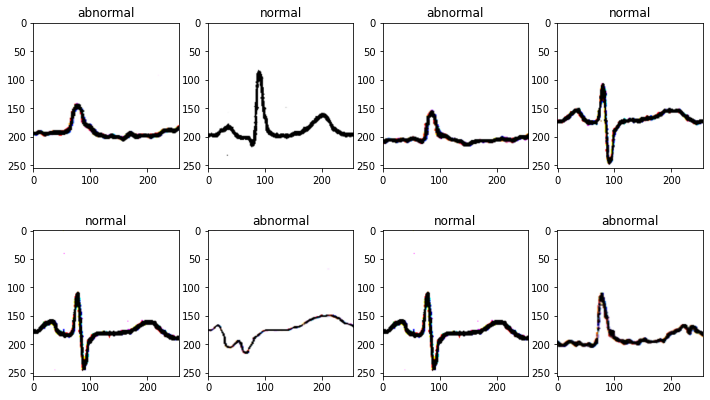

In [10]:
import matplotlib.pyplot as plt
import random

plt.figure(figsize = (12,7))
cate = ['normal', 'abnormal']
for i in range(8):
  ind = random.randint(0, len(X_train))
  plt.subplot(240 + 1 + i)
  plt.imshow(X_train[ind])
  plt.title(cate[y_train[ind]])

In [11]:
def preprocess_data(X, y):
  # convert X from list to array
  X = np.array(X)
  
  # convert integer values of X into floats
  X = X.astype(np.float32)

  # normalization 
  X = X/255.0
  
  # one-hot encoding the labels 
  y = to_categorical(np.array(y))
    
  return X, y
  
(X_train, y_train) = preprocess_data(X_train, y_train)
(X_test, y_test) = preprocess_data(X_test, y_test)

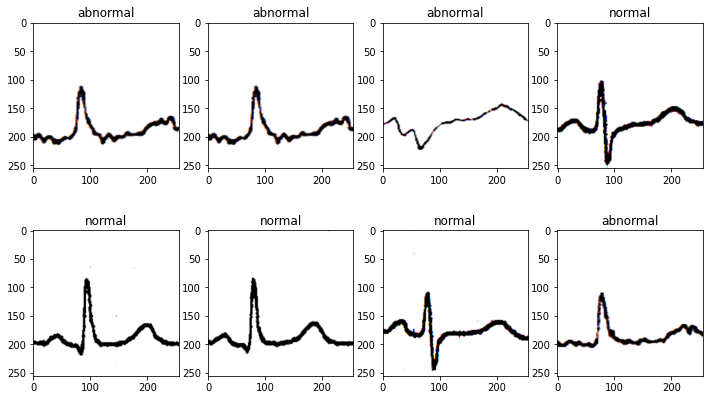

In [12]:
plt.figure(figsize = (12,7))
for i in range(8):
  ind = random.randint(0, len(X_train))
  plt.subplot(240 + 1 + i)
  plt.imshow(X_train[ind])
  plt.title(cate[np.argmax(y_train[ind])])

## **Model Training CNN**

In [68]:
def CNN():
  # Initialize the model
  model = Sequential()

  # layer 1: convolutional layer + max-pooling layer
  model.add(Conv2D(filters = 96, kernel_size = (2,2), strides= 2, padding = 'valid', 
                   activation='relu', input_shape = (256,256, 3)))
  model.add(MaxPooling2D(pool_size = (3,3), strides = 2))

  model.add(Flatten())
  model.add(Dense(2, activation = 'softmax'))

  # compile the model with a loss funciton, a metric and and optimizqation method
  opt = SGD(learning_rate = 0.1)
  model.compile(loss = binary_crossentropy,
                optimizer = opt,
                metrics = ['accuracy'], run_eagerly=True)

  return model

In [69]:
CNN_model = CNN()
CNN_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 128, 128, 96)      1248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 63, 63, 96)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 381024)            0         
                                                                 
 dense_1 (Dense)             (None, 2)                 762050    
                                                                 
Total params: 763,298
Trainable params: 763,298
Non-trainable params: 0
_________________________________________________________________


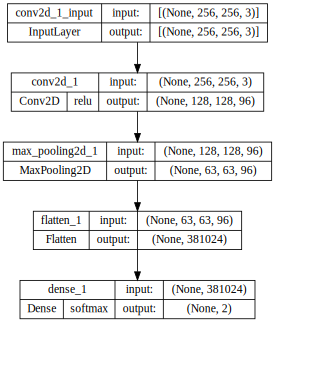

In [70]:
SVG(tf.keras.utils.model_to_dot(
    CNN_model, show_shapes=True, show_layer_names=True, rankdir='TB',
    expand_nested=True, dpi=60, subgraph=False, show_layer_activations=True
).create(prog='dot',format='svg'))

## **Training Process CNN**

In [71]:
def train_model(model, X_train, y_train, X_test, y_test, epochs, batch_size):
  # Data generator
  datagen = ImageDataGenerator(rotation_range = 0, width_shift_range = 0, 
                               height_shift_range = 0.1, horizontal_flip = False)
  # iteration on the training set
  it_train = datagen.flow(X_train, y_train, batch_size = batch_size)
  # path to save the checkpoint 
  path_cp = os.getcwd() + '/' + 'weights_.hdf5'
  checkpoint_ = ModelCheckpoint(path_cp, monitor = 'loss', save_best_only = False, 
                                mode = 'auto')
  steps = X_train.shape[0]//batch_size
  # Fitting the model
  history = model.fit_generator(it_train, epochs = epochs, steps_per_epoch = steps, 
                                validation_data = (X_test, y_test), verbose = 1, 
                                callbacks = checkpoint_)
  # Evaluating the model
  _, acc = model.evaluate(X_test, y_test, verbose = 1)
  print('%.3f' % (acc * 100.0))
  
  return history, acc

In [72]:
train_history, acc = train_model(CNN_model, X_train, y_train, X_test, y_test, 
                                 epochs = 50, batch_size = 30)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  from ipykernel import kernelapp as app


Epoch 1/50
5/5 [==============================] - 8s 1s/step - loss: 9.6219 - accuracy: 0.6467 - val_loss: 0.6681 - val_accuracy: 0.8889
Epoch 2/50
5/5 [==============================] - 7s 1s/step - loss: 0.6585 - accuracy: 0.8143 - val_loss: 0.6249 - val_accuracy: 0.8889
Epoch 3/50
5/5 [==============================] - 7s 1s/step - loss: 0.6135 - accuracy: 0.8714 - val_loss: 0.5386 - val_accuracy: 1.0000
Epoch 4/50
5/5 [==============================] - 6s 1s/step - loss: 0.5361 - accuracy: 0.8786 - val_loss: 0.4405 - val_accuracy: 1.0000
Epoch 5/50
5/5 [==============================] - 6s 1s/step - loss: 0.4294 - accuracy: 0.9429 - val_loss: 0.3180 - val_accuracy: 1.0000
Epoch 6/50
5/5 [==============================] - 7s 1s/step - loss: 0.3321 - accuracy: 0.9429 - val_loss: 0.2452 - val_accuracy: 0.8889
Epoch 7/50
5/5 [==============================] - 7s 1s/step - loss: 0.2935 - accuracy: 0.9357 - val_loss: 0.1790 - val_accuracy: 1.0000
Epoch 8/50
5/5 [=========================

In [73]:
import pandas as pd

# convert the history.history to a pandas DataFrame:     
train_hist_df = pd.DataFrame(train_history.history) 

train_dict = {'train_hist': train_hist_df, 
              'acc': acc}
np.save('train_dict.npy', train_dict)  

In [75]:
CNN_model.save('CNN_model.h5')

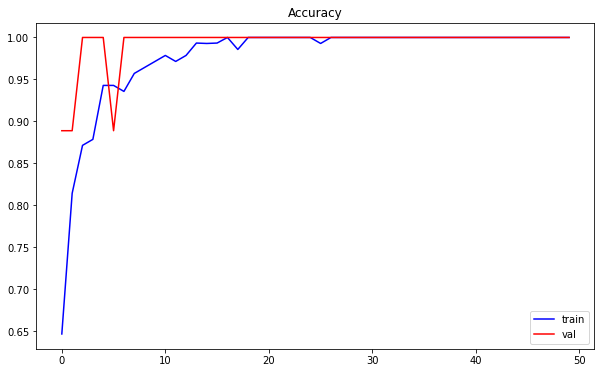

In [76]:
def plot_accuracy(history):
  plt.figure(figsize = (10,6))
  plt.plot(history.history['accuracy'], color = 'blue', label = 'train')
  plt.plot(history.history['val_accuracy'], color = 'red', label = 'val')
  plt.legend()
  plt.title('Accuracy')
  plt.show()
  
plot_accuracy(train_history)

In [78]:
y_test_pred = []
for i in np.arange(len(X_test)):
  img = X_test[i]
  img = img.reshape(1, 256, 256, 3)
  y_p = CNN_model.predict(img)
  y_test_pred.append(y_p)

y_test_pred = np.asarray(y_test_pred)

1/1 [==============================] - 0s 35ms/step


Text(69.0, 0.5, 'True classes')

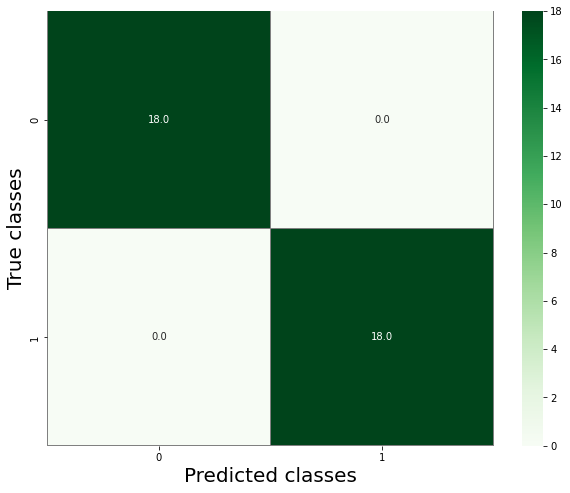

In [80]:
# Reverse the true and the predicted labels into the original binary 
# labels (0 and 1) to compute the confusion matrix
y_test_labels = [np.argmax(vect) for vect in y_test]
y_test_pred_labels = [np.argmax(vect) for vect in y_test_pred]

conf_mat = confusion_matrix(y_test_labels, y_test_pred_labels)

plt.figure(figsize = (10,8))
sns.heatmap(conf_mat, linewidths = 0.1, cmap = 'Greens', linecolor = 'gray', 
            fmt = '.1f', annot = True)
plt.xlabel('Predicted classes', fontsize = 20)
plt.ylabel('True classes', fontsize = 20)

1/1 [==============================] - 0s 43ms/step


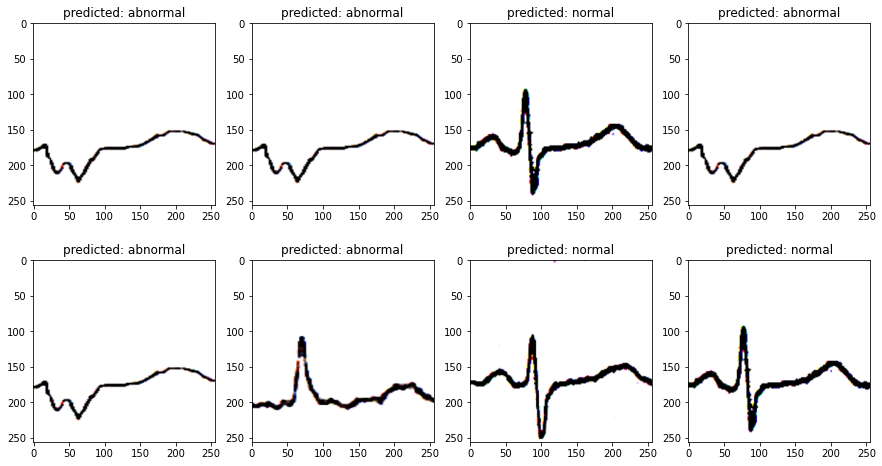

In [82]:
plt.figure(figsize = (15,8))
for i in np.arange(8):
  # take randomly an indice
  ind = random.randint(0, len(X_test))
  img = X_test[ind]
  # reshape the image 
  img_rs = img.reshape(1,256,256,3)
  # predict the label of img
  y_pred = CNN_model.predict(img_rs)
  # determine the corresponding category
  predicted_cate = cate[np.argmax(y_pred)]
  plt.subplot(240+1+i)
  plt.imshow(img)
  plt.title('predicted: ' + str(predicted_cate))

In [91]:
scores = CNN_model.evaluate(X_test,y_test, verbose=1)
y_noise_predict = CNN_model.predict(X_test)

2/2 [==============================] - 0s 57ms/step


In [93]:
print("Accuracy = %0.6f" % accuracy_score(y_test.argmax(axis=1),y_noise_predict.argmax(axis=1)))
print( classification_report(y_test.argmax(axis=1),y_noise_predict.argmax(axis=1)))

Accuracy = 1.000000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        18

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



1/1 [==============================] - 0s 30ms/step


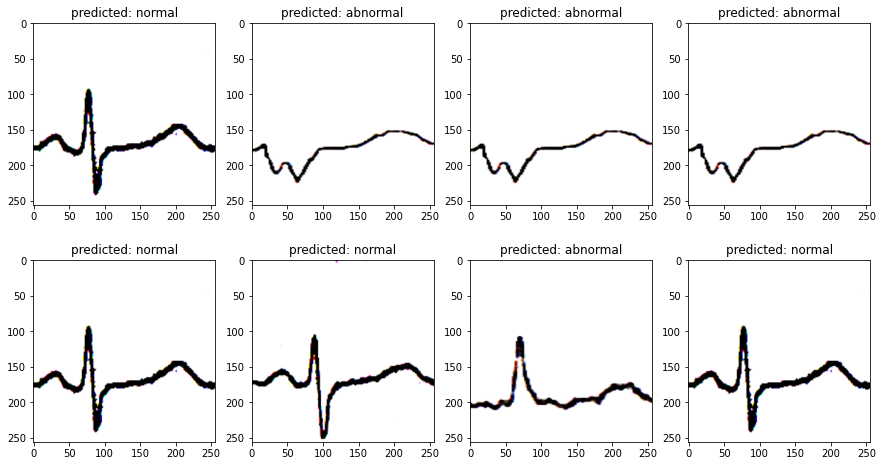

In [94]:
plt.figure(figsize = (15,8))
for i in np.arange(8):
  # take randomly an indice
  ind = random.randint(0, len(X_test))
  img = X_test[ind]
  # reshape the image 
  img_rs = img.reshape(1,256,256,3)
  # predict the label of img
  y_pred = CNN_model.predict(img_rs)
  # determine the corresponding category
  predicted_cate = cate[np.argmax(y_pred)]
  plt.subplot(240+1+i)
  plt.imshow(img)
  plt.title('predicted: ' + str(predicted_cate))

## **Model Training AlexNet**

In [33]:
def Alexnet():
  # Initialize the model
  model = Sequential()

  # layer 1: convolutional layer + max-pooling layer
  model.add(Conv2D(filters = 96, kernel_size = (2,2), strides= 2, padding = 'valid', 
                   activation='relu', input_shape = (256,256,3)))
  model.add(MaxPooling2D(pool_size = (3,3), strides = 2))

  # layer 2: convolutional layer + max-pooling layer 
  model.add(Conv2D(filters = 256, kernel_size = (5,5), padding = 'same', 
                   activation = 'relu'))
  model.add(MaxPooling2D(pool_size = (3,3), strides = 2))

  # layers 3-5: three convolutional layers + 1 max-pooling layer
  model.add(Conv2D(filters = 384, kernel_size = (3,3), padding = 'same', 
                   activation = 'relu'))
  model.add(Conv2D(filters = 384, kernel_size = (3,3), padding = 'same', 
                   activation = 'relu'))
  model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = 'same', 
                   activation = 'relu'))
  model.add(MaxPooling2D(pool_size = (3,3), strides = 2))

  # layers 6 - 8: two fully connected hidden layers and one fully connected output layer
  model.add(Flatten())
  model.add(Dense(4096, activation = 'relu'))
  model.add(Dropout(0.2))
  model.add(Dense(2048, activation = 'relu'))
  model.add(Dropout(0.2))
  model.add(Dense(2, activation = 'softmax'))

  # compile the model with a loss funciton, a metric and and optimizqation method
  opt = SGD(learning_rate = 0.1)
  model.compile(loss = binary_crossentropy,
                optimizer = opt,
                metrics = ['accuracy'], run_eagerly=True)

  return model

In [34]:
Alexnet_model = Alexnet()
Alexnet_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 128, 128, 96)      1248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 63, 63, 96)       0         
 2D)                                                             
                                                                 
 conv2d_18 (Conv2D)          (None, 63, 63, 256)       614656    
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 31, 31, 256)      0         
 2D)                                                             
                                                                 
 conv2d_19 (Conv2D)          (None, 31, 31, 384)       885120    
                                                                 
 conv2d_20 (Conv2D)          (None, 31, 31, 384)      

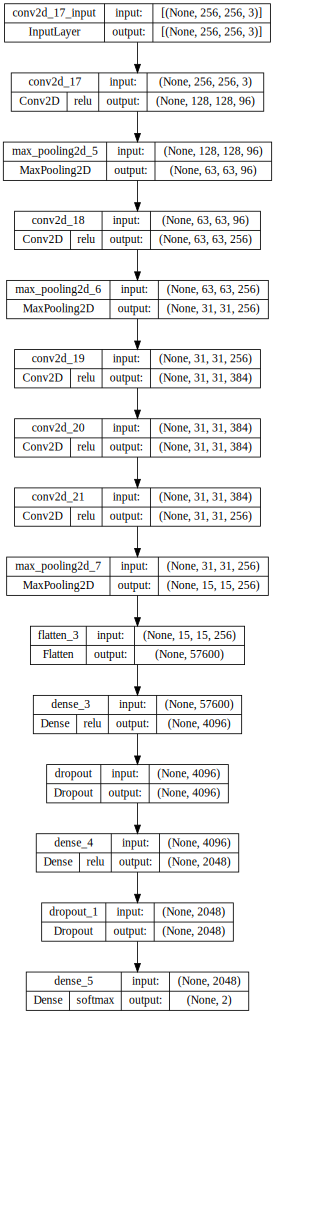

In [35]:
SVG(tf.keras.utils.model_to_dot(
    Alexnet_model, show_shapes=True, show_layer_names=True, rankdir='TB',
    expand_nested=True, dpi=60, subgraph=False, show_layer_activations=True
).create(prog='dot',format='svg'))

## **Training AlexNet**

In [36]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint

def train_model(model, X_train, y_train, X_test, y_test, epochs, batch_size):
  # Data generator
  datagen = ImageDataGenerator(rotation_range = 0, width_shift_range = 0, 
                               height_shift_range = 0.1, horizontal_flip = False)
  # iteration on the training set
  it_train = datagen.flow(X_train, y_train, batch_size = batch_size)
  # path to save the checkpoint 
  path_cp = os.getcwd() + '/' + 'weights_.hdf5'
  checkpoint_ = ModelCheckpoint(path_cp, monitor = 'loss', save_best_only = False, 
                                mode = 'auto')
  steps = X_train.shape[0]//batch_size
  # Fitting the model
  history = model.fit_generator(it_train, epochs = epochs, steps_per_epoch = steps, 
                                validation_data = (X_test, y_test), verbose = 1, 
                                callbacks = checkpoint_)
  # Evaluating the model
  _, acc = model.evaluate(X_test, y_test, verbose = 1)
  print('%.3f' % (acc * 100.0))
  
  return history, acc

In [37]:
train_history, acc = train_model(Alexnet_model, X_train, y_train, X_test, y_test, 
                                 epochs = 50, batch_size = 30)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/50
5/5 [==============================] - 7s 2s/step - loss: 0.6990 - accuracy: 0.5000 - val_loss: 0.6900 - val_accuracy: 0.5000
Epoch 2/50
5/5 [==============================] - 6s 1s/step - loss: 0.6868 - accuracy: 0.5929 - val_loss: 0.6713 - val_accuracy: 0.8889
Epoch 3/50
5/5 [==============================] - 10s 2s/step - loss: 0.6733 - accuracy: 0.7467 - val_loss: 0.6363 - val_accuracy: 0.5000
Epoch 4/50
5/5 [==============================] - 8s 2s/step - loss: 0.6673 - accuracy: 0.5286 - val_loss: 0.6600 - val_accuracy: 0.5000
Epoch 5/50
5/5 [==============================] - 6s 1s/step - loss: 0.6853 - accuracy: 0.5286 - val_loss: 0.6911 - val_accuracy: 0.5000
Epoch 6/50
5/5 [==============================] - 7s 2s/step - loss: 0.6904 - accuracy: 0.5067 - val_loss: 0.6848 - val_accuracy: 0.8889
Epoch 7/50
5/5 [==============================] - 7s 2s/step - loss: 0.6838 - accuracy: 0.7429 - val_loss: 0.6631 - val_accuracy: 0.8889
Epoch 8/50
5/5 [========================

In [38]:
import pandas as pd

# convert the history.history to a pandas DataFrame:     
train_hist_df = pd.DataFrame(train_history.history) 

train_dict = {'train_hist': train_hist_df, 
              'acc': acc}
np.save('train_dict.npy', train_dict)  

In [39]:
Alexnet_model.save('Alexnet_model.h5')

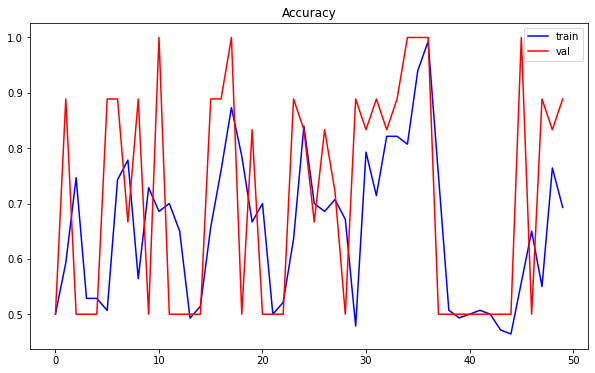

In [40]:
def plot_accuracy(history):
  plt.figure(figsize = (10,6))
  plt.plot(history.history['accuracy'], color = 'blue', label = 'train')
  plt.plot(history.history['val_accuracy'], color = 'red', label = 'val')
  plt.legend()
  plt.title('Accuracy')
  plt.show()
  
plot_accuracy(train_history)

In [41]:
y_test_pred = []
for i in np.arange(len(X_test)):
  img = X_test[i]
  img = img.reshape(1, 256, 256, 3)
  y_p = Alexnet_model.predict(img)
  y_test_pred.append(y_p)

y_test_pred = np.asarray(y_test_pred)

1/1 [==============================] - 0s 19ms/step


Text(69.0, 0.5, 'True classes')

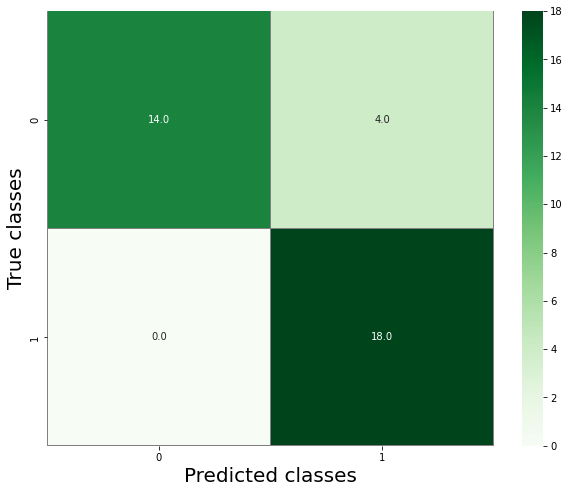

In [42]:
from sklearn.metrics import confusion_matrix
import seaborn as sns 

# Reverse the true and the predicted labels into the original binary 
# labels (0 and 1) to compute the confusion matrix
y_test_labels = [np.argmax(vect) for vect in y_test]
y_test_pred_labels = [np.argmax(vect) for vect in y_test_pred]

conf_mat = confusion_matrix(y_test_labels, y_test_pred_labels)

plt.figure(figsize = (10,8))
sns.heatmap(conf_mat, linewidths = 0.1, cmap = 'Greens', linecolor = 'gray', 
            fmt = '.1f', annot = True)
plt.xlabel('Predicted classes', fontsize = 20)
plt.ylabel('True classes', fontsize = 20)

1/1 [==============================] - 0s 23ms/step


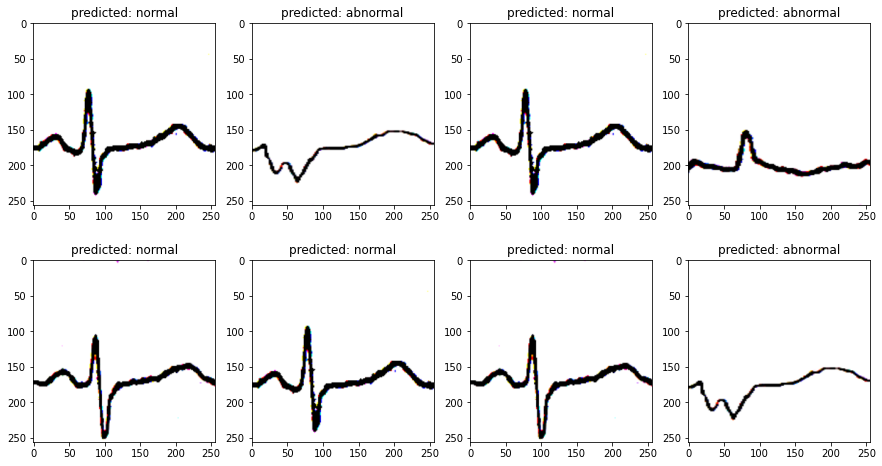

In [43]:
plt.figure(figsize = (15,8))
for i in np.arange(8):
  # take randomly an indice
  ind = random.randint(0, len(X_test))
  img = X_test[ind]
  # reshape the image 
  img_rs = img.reshape(1,256,256,3)
  # predict the label of img
  y_pred = Alexnet_model.predict(img_rs)
  # determine the corresponding category
  predicted_cate = cate[np.argmax(y_pred)]
  plt.subplot(240+1+i)
  plt.imshow(img)
  plt.title('predicted: ' + str(predicted_cate))

In [44]:
scores = Alexnet_model.evaluate(X_test,y_test, verbose=1)
y_noise_predict = Alexnet_model.predict(X_test)

2/2 [==============================] - 0s 58ms/step


In [45]:
print("Accuracy = %0.6f" % accuracy_score(y_test.argmax(axis=1),y_noise_predict.argmax(axis=1)))
print( classification_report(y_test.argmax(axis=1),y_noise_predict.argmax(axis=1)))

Accuracy = 0.888889
              precision    recall  f1-score   support

           0       1.00      0.78      0.88        18
           1       0.82      1.00      0.90        18

    accuracy                           0.89        36
   macro avg       0.91      0.89      0.89        36
weighted avg       0.91      0.89      0.89        36

